# Titanic Survival
## Reagan Berhe
#### Grading:


- Code: 90 pts
- Markdown Documentation: 10 pts


We are going to study the survival rate of passengers on titanic and what variables affected survival.

Load the dataset in `titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [1]:
from IPython.core.display import HTML
HTML(filename='../data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


In [2]:
# you would need xlrd - pip install xlrd
import pandas as pd 
t_file = pd.ExcelFile('../data/titanic.xls')
t_df = t_file.parse("titanic")
t_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Women and children first?

*** 1. Use the `groupby` method to calculate the proportion of passengers that survived by sex. (10 pts)*** 

* By using the groupby method, we can group number of survival (value =1) across gender male and female form the database.  
* By looking at the data we can conclude that there are more female surviver = 339 and for male passangers there is less survival rate comparing to females which was only 161 male passengers out of 843.


                 name
sex    survived      
female 0          127
       1          339
male   0          682
       1          161


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb12aea00d0>]],
      dtype=object)

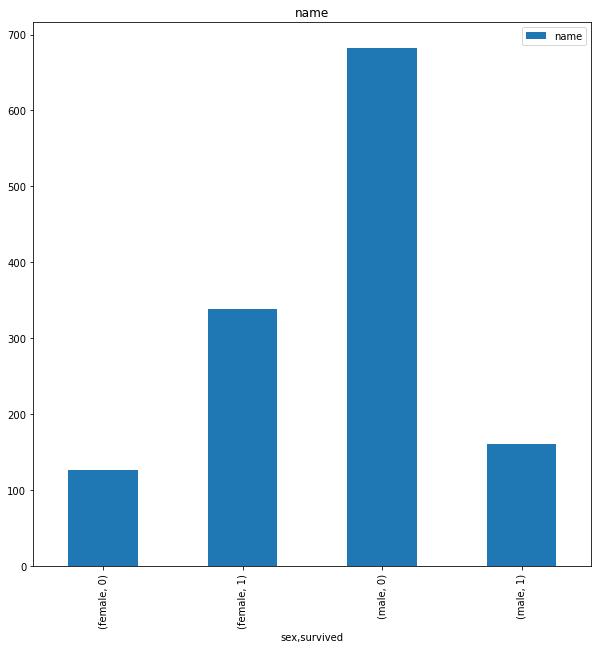

In [4]:
df = t_df.groupby(["sex",'survived'])[['name']].count()
print(df)
df.plot.bar(subplots=True, layout=(1,1), figsize=(10, 10))

*** 2. Calculate the same proportion, but by class and sex. (10 pts)*** 

* By grouping them according to thier classes, we can clearly understand most female survivor is from higer classes


sex     pclass  survived
female  1       0             5
                1           139
        2       0            12
                1            94
        3       0           110
                1           106
male    1       0           118
                1            61
        2       0           146
                1            25
        3       0           418
                1            75
Name: name, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd745055dc0>]],
      dtype=object)

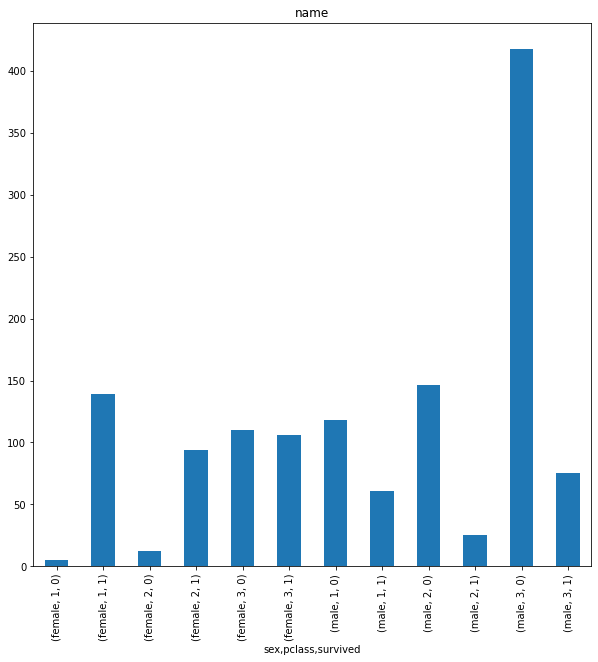

In [51]:
df = t_df.groupby(["sex",'pclass','survived'])['name'].count()
print(df)
df.plot.bar(subplots=True, layout=(1,1), figsize=(10, 10))

*** 3. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex. (20 pts)***

* We can also group age range to understand the fatality of different class in different age group.
* For example: we can answer a question if female and children under 14 passengers were prirotised on the scape boat, or is different class treated differenetly in the escaping boat. 

sex     survived  pclass  agerange                 
female  0         1       children (under 14 years)      1
                          adolescents (14-20)            0
                          adult (21-64)                  4
                          senior(65+)                    0
                  2       children (under 14 years)      0
                          adolescents (14-20)            1
                          adult (21-64)                 10
                          senior(65+)                    0
                  3       children (under 14 years)     17
                          adolescents (14-20)           19
                          adult (21-64)                 44
                          senior(65+)                    0
        1         1       children (under 14 years)      1
                          adolescents (14-20)           17
                          adult (21-64)                109
                          senior(65+)                    0
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb12bc03c40>]],
      dtype=object)

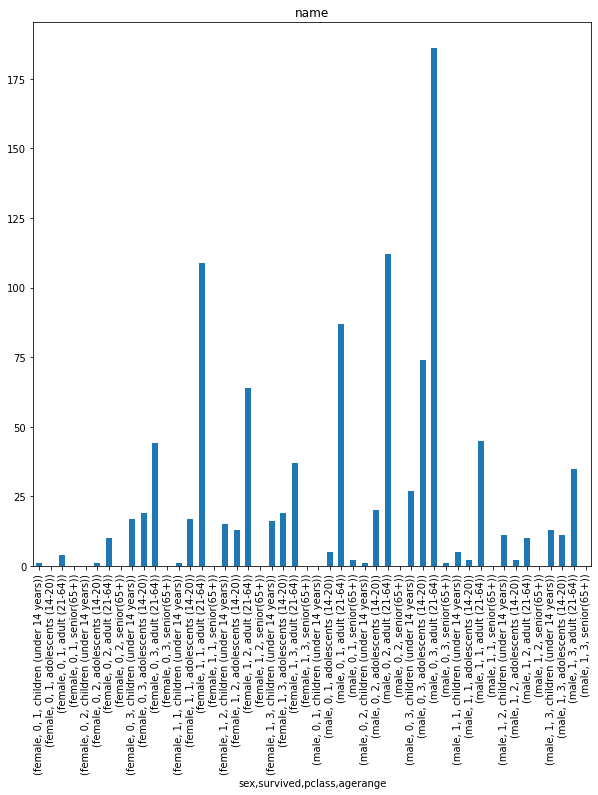

In [9]:
pd.options.display.float_format = '{:,.0f}'.format

# creating Age group srarting 'children (under 14 years)', 'adolescents (14-20)', 'adult (21-64)', 'senior(65+)']
bins = [0, 14, 21, 64,65]

labels = ['children (under 14 years)', 'adolescents (14-20)', 'adult (21-64)', 'senior(65+)']
t_df['agerange'] = pd.cut(t_df.age, bins, labels = labels,include_lowest = True)

t_df_survval_age_group = t_df.groupby(['sex','survived','pclass','agerange'])['name'].count()
print(t_df_survval_age_group)
t_df_survval_age_group.plot.bar(subplots=True, layout=(1,1), figsize=(10, 10))